# Lab1 Titanic passangers' data analysis
---

By doing this lab you should get acquinted with API of basic machine learning python libraries such as:

* scikit-learn
* numpy
* pandas
* matplotlib

This task will give ?? points

## TASK:

[Kaggle](https://www.kaggle.com/) is a data analysis competition platform. Even if you don't interested in that kind of competitions (but there is assumption that you should be interested), there are a lot of examples of rather good data analysis, called [kernels](https://www.kaggle.com/kernels) in kaggle terminology, that you can consult during this course.

1. You should register on [Kaggle](https://www.kaggle.com/) to be able to download datasets.
2. Download dataset `train.csv` from [Titanic: Machine Learning from Disaster](http://www.kaggle.com/c/titanic-gettingStarted/data). You will find dataset description there as well.
3. Every research or analysis are meaningless without right questions, hypothesises? To warm up you need to find meaningfull answers for the next questions:
    - How many passengers was travelling by first class?
    - What is the most popular female name on board?
    - How does ticket cost varie?
    - What titles (ex.: Mrs., Mr.) you could find in dataset and which class did they travel?
    - Are there any dependencies between class and ticket number?
    - What part of passengers was able to survive?
    - Are there any correlation between the number of brothers/sisters and the number of parents/kids ?
   
4. Try to find some correlations or dependencies manually and support/prove them with graphs or statistics. Find some exact rules describing some subset of survived class. What can you say about interpretation complexity of there rules? 
5. Check the following assumptions:
    - Females survived more frequently than mens
    - Passangers with more expensive tickets survived with higher probability
    
## Report

All reports should be delivered in the format of IPython (Jupyter) Notebooks (`.ipynb` files). 



## TOOLS AND LINKS

  * [Collection of interesting notebooks](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks)

###  Python libraries

  * [NumPy](http://www.numpy.org/)
    - [graph library Matlab](http://wiki.scipy.org/NumPy_for_Matlab_Users)
  * [Pandas](http://pandas.pydata.org/)
    - [how to work with datasets using pandas](http://nbviewer.ipython.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb)
  * [Matplotlib](http://matplotlib.org/index.html)
    - [pyplot](http://matplotlib.org/api/pyplot_api.html) — matlab graph utility emulation in python
    - [example gallery](http://matplotlib.org/gallery.html)
  * [SciPy](http://scipy.org/)





# Answers by Grishina Anastasiia

### How many passengers was travelling by first class?

Re: 216

# to work with filepathes use os.path.join() because for different OS path divisor might be different

In [108]:
import pandas as pd
import csv
import os

Working_dir = os.getcwd() 
train_df = pd.read_csv( os.path.join( Working_dir, "train.csv" ) )

VIP_passengers = train_df [ train_df[ "Pclass" ] == 1 ].count()[ "PassengerId" ]
print ( VIP_passengers )

216


-----------------------------------------

### What is the most popular female name on board?

Re: Anna, 15 



The name is found based on the following:

Heikkinen, Miss. Laina -> Laina

Futrelle, Mrs. Jacques Heath (Lily May Peel) -> Lily

Hewlett, Mrs. (Mary D Kingcome) -> Mary

McGowan, Miss. Anna "Annie" -> Anna

Yrois, Miss. Henriette ("Mrs Harbeck") -> Henriette

# 2. implement logic as function and use pandas apply instead of   (code)
# 3. I think it would be simpler to create Counter collection from array and it will count names

In [109]:
# ladies = names of all women
ladies = train_df [ train_df[ "Sex" ]=="female" ]["Name"]

# list of names
l_names = ['']

def make_list_of_names ( string ):#, list_of_names
    # search for name only after the title
    s = string.split(". ")
    s = s[1]
    
    # if bracket occurs => first after the bracket without quotes
    if '(' in s:
        if not ('("' in s ):
            s = s.split( "(" )[1]

    # delete unwanted character
    for c in ')"':
        s = s.replace( c, "" )

    # extract name
    s = s.split(" ")[0]
    return s

l_names = train_df[ train_df.Sex == 'female' ].Name.apply ( make_list_of_names )

count_names = []
# for i in range (0, len(l_names)):
#     count_names.append( l_names.count(l_names[i]) )
# print ( l_names [ count_names.index ( max( count_names ) ) ] )
# print ( max( count_names ) )
    
import collections
count_names = collections.Counter ( l_names )

popular_names = count_names.most_common (2)
popular_names

[('Anna', 15), ('Mary', 14)]

-----------------------------------------

### How does ticket cost varie?

Re: in output of the cells, i.e. min = 0; max = 512.329

# 4. Very complex 
I used your variant

In [110]:
fare = 0
i = 0
num = 0
for i in range(1,4):
    fare = train_df[ train_df[ "Pclass" ] == i  ][ "Fare" ].min()
    print ( "Class %i: Minimal ticket fare is %.3f" %(i, fare) )
    
    fare = train_df[ train_df[ "Pclass" ] == i  ][ "Fare" ].max()
    print ( "Class %i: Minimal ticket fare is %.3f" %(i, fare) )

    fare = train_df[(train_df[ "Pclass" ] == i) \
                    & (train_df[ "Fare" ] > 0 )][ "Fare" ].min()
        
    print ( "Class %i: Minimal non-zero ticket fare is %.3f" %(i, fare))
    print('')

Class 1: Minimal ticket fare is 0.000
Class 1: Minimal ticket fare is 512.329
Class 1: Minimal non-zero ticket fare is 5.000

Class 2: Minimal ticket fare is 0.000
Class 2: Minimal ticket fare is 73.500
Class 2: Minimal non-zero ticket fare is 10.500

Class 3: Minimal ticket fare is 0.000
Class 3: Minimal ticket fare is 69.550
Class 3: Minimal non-zero ticket fare is 4.013



-----------------------------------------

### What titles (ex.: Mrs., Mr.) you could find in dataset and which class did they travel?

Re: in output of the cells

# 5. instead 
#### train_df["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

# we can use name.split('.')[0]
# and again apply + values_count


# 6. looks like you need some groupby (for the code below)

In [111]:

# if train_df["Pclass"][i] == 1:
#         passengers_classes.ix[name,'Class 1'] += 1
#     elif train_df["Pclass"][i] == 2:
#         passengers_classes.ix[name,'Class 2'] += 1
#     else:
#         passengers_classes.ix[name,'Class 3'] += 1


did not get your idea about groupby, applied corrections ( apply, value_counts )

In [112]:
titles = []
all_names = train_df ["Name"]

def find_title ( name ):
    name = name.split(", ")[1]
    name = name.split(". ")[0]
    return ( name )
titles = train_df.Name.apply ( find_title )

# extract unique titles
unique_titles = []

train_with_titles = train_df.assign( Title = titles)
unique_titles = train_with_titles.Title.unique()

passengers_classes = pd.DataFrame( 0, index = unique_titles, columns = ["Class 1", "Class 2", "Class 3"])

for title in unique_titles:
    for i in range ( 1,4 ):
        i_str = str(i)
        s = pd.value_counts ( train_with_titles.Pclass [ ( train_with_titles.Title == title ) \
                                           & ( train_with_titles.Pclass == i ) ], sort=False )
        Class = 'Class ' + i_str

        if not s.empty:
            passengers_classes.ix[title, Class] = s.ix[i]

print ( passengers_classes )

              Class 1  Class 2  Class 3
Mr                107       91      319
Mrs                42       41       42
Miss               46       34      102
Master              3        9       28
Don                 1        0        0
Rev                 0        6        0
Dr                  5        2        0
Mme                 1        0        0
Ms                  0        1        0
Major               2        0        0
Lady                1        0        0
Sir                 1        0        0
Mlle                2        0        0
Col                 2        0        0
Capt                1        0        0
the Countess        1        0        0
Jonkheer            1        0        0


-----------------------------------------

### Are there any dependencies between class and ticket number?

# 7.  use markdown for comments
#### code output should be just for reference, concise and clear

# 8. It was quiet hard to read answer for question about ticket-class connection
Because you have computed the same statistic for different class in different cells,
It would be better to aggregate results, it is hard to compare numbers for different classes.
Provide results in one table or think how to visualize the numbers.

#### My answer is in the form of a table now. Please, find it below the calculations

In [113]:
class_table = pd.DataFrame( 0, index = ['Ticket No starts with No of class, %',\
                                       'Ticket No starts with No of class, drop first characters, %',\
                                       'Specific features'], columns = ["Class 1", "Class 2", "Class 3"])

class 1

In [114]:
class_1 = train_df[train_df[ "Pclass" ] == 1 ]["Ticket"] 

total_num_begin_with_1 = 0
s = ''
for s in class_1:
    if s[0] == "1":
        total_num_begin_with_1 = total_num_begin_with_1 + 1

class_table.ix[0,0] = total_num_begin_with_1/float(len(class_1)) * 100.

In [115]:
s =''
total_num_begin_with_letter_1 = 0
for s in class_1:
    if s[0] <> "1" and " " in s:
        s = s.split(" ")[1]
        if s[0] == "1":
            total_num_begin_with_letter_1 += 1
            
class_table.ix[1,0] = ( total_num_begin_with_1 + total_num_begin_with_letter_1 )/ float(len(class_1) ) * 100. 

In [116]:
count_class_1_PC = 0
for s in class_1:
    if s[0:2] == "PC":
        count_class_1_PC = count_class_1_PC + 1

spec_feat_val = count_class_1_PC / float(len(class_1)) * 100.
class_table.ix[2,0] = 'Tickets starting with characters "PC" compose %2.3f percent of all 1st class tickets'  %( spec_feat_val ) 

class 2

In [117]:
class_2 = train_df[train_df[ "Pclass" ] == 2 ]["Ticket"] 

total_num_begin_with_2 = 0
for s in class_2:
    if s[0] == "2":
#         print ( s )
        total_num_begin_with_2 += 1
    
class_table.ix[0,1] = total_num_begin_with_2/float(len(class_2)) * 100.


In [118]:
total_num_begin_with_letter_2 = 0
for s in class_2:
    if s[0] <> "2" and " " in s:
        s = s.split(" ")[1]
        if s[0] == "2":
            total_num_begin_with_letter_2 += 1

class_table.ix[1,1] = ( total_num_begin_with_2 + total_num_begin_with_letter_2 ) / float(len(class_2) ) * 100.


In [119]:
for s in class_2:
    if s[0:8] == "SC/PARIS":
        print ( s )
print ( '' )

for s in class_2:
    if s[0:4] == "C.A." and s.split(" ")[1][0] == "2":
        print ( s )
print ( '' )

for s in class_2:
    if ( s[0:4] == "SO/C" or s[0:6] == "S.O.C." ) and s.split(" ")[1][0] == "2":
        print ( s )

class_table.ix[2,1] = 'Tickets of class 2 starting with characters "SC/PARIS" or "SO/C" or "S.O.C." begin with 2. ' \
                + 'No ticket of class 2 starting with characters "C.A" begins with 2. '

SC/PARIS 2133
SC/PARIS 2131
SC/PARIS 2167
SC/PARIS 2146
SC/PARIS 2149

C.A. 24579
C.A. 29395
C.A. 29178
C.A. 29566
C.A. 24580



class 3

In [120]:
class_3 = train_df[train_df[ "Pclass" ] == 3 ]["Ticket"] 

total_num_begin_with_3 = 0
for s in class_3:
    if s[0] == "3":
        total_num_begin_with_3 = total_num_begin_with_3 + 1

class_table.ix[0,2] = total_num_begin_with_3/float(len(class_3)) * 100.

In [121]:
total_num_begin_with_letter_3 = 0
for s in class_3:
    if s[0] <> "3" and " " in s:
        s = s.split(" ")[1]
        if s[0] == "3":
            total_num_begin_with_letter_3 += 1

class_table.ix[1,2] = ( total_num_begin_with_3 + total_num_begin_with_letter_3 ) / float(len(class_3) ) * 100.


In [122]:
count_class_3_STON = 0
for s in class_3:
    if s[0:3] == "STO":
#         print ( s )
        count_class_3_STON += 1

spec_feat_3_val = count_class_3_STON / float(len(class_3)) * 100.
class_table.ix[2,2] ='Tickets of class 3 starting with characters "STON/" compose %2.3f percent of all 3d class tickets'%( spec_feat_3_val ) 

In [123]:
pd.set_option('max_colwidth',200)
class_table

,Class 1,Class 2,Class 3
"Ticket No starts with No of class, %",60.6481,64.6739,57.4338
"Ticket No starts with No of class, drop first characters, %",88.8889,73.913,64.7658
Specific features,"Tickets starting with characters ""PC"" compose 27.778 percent of all 1st class tickets","Tickets of class 2 starting with characters ""SC/PARIS"" or ""SO/C"" or ""S.O.C."" begin with 2. No ticket of class 2 starting with characters ""C.A"" begins with 2.","Tickets of class 3 starting with characters ""STON/"" compose 3.666 percent of all 3d class tickets"


-----------------------------------------

### What part of passengers was able to survive?

342 people survived

This is 38 percent of all passengers

In [124]:
print ( sum( train_df [ 'Survived' ] ) )
print ( sum( train_df [ 'Survived' ] ) /float ( len ( train_df.index) ) *100 ) 

342
38.3838383838


-----------------------------------------

### Are there any correlation between the number of brothers/sisters and the number of parents/kids ?

Re:
* There are 142 passengers with family members aboard
* In percentage they compose ~16% of all passengers
* There are members of the family with 8 Siblings/Spouses and 2 Parents/Children on board ( but in the train set there is no person with 9 SibSp and 1 Parch, so the parents  ust be in the train set
* There are members of the family with 5 Siblings/Spouses and 2 Parents/Children on board
* families with 4 Siblings/Spouses have 1 or 2 Parents/Children members
* families with 3 Siblings/Spouses have 0 - 2 Parents/Children members


# 9. What is a purpose of such cells

Sibsp_group_by_par = list ( train_df[['PassengerId','SibSp', 'Parch']].groupby(train_df["Parch"]) )

print ( Sibsp_group_by_par )

What should I see from that print?

## Answer
All the conclusions are made above in "Re:"

Those prints were helpful for me to derive this conclusions

In this version I have toggled comments for the prints

In [125]:
train_df[ [ 'SibSp', 'Parch' ] ].corr()

,SibSp,Parch
SibSp,1.000000,0.414838
Parch,0.414838,1.000000


passengers with family members

In [126]:
print( len ( train_df[ ( train_df['SibSp'] > 0 ) & ( train_df['Parch'] > 0 ) ] ) )

142


In percentage they compose ~16% of all passengers

In [127]:
float ( len ( train_df[ ( train_df['SibSp'] > 0 ) \
                       & ( train_df['Parch'] > 0 ) ].index ) ) / float ( len ( train_df.index) ) * 100

15.937149270482603

In [128]:
Sibsp_group_by_sib = list ( train_df[['PassengerId','SibSp', 'Parch']].groupby(train_df["SibSp"]) )

# print ( Sibsp_group_by_sib )

In [129]:
Sibsp_group_by_par = list ( train_df[['PassengerId','SibSp', 'Parch']].groupby(train_df["Parch"]) )

# print ( Sibsp_group_by_par )

In [130]:
Sibsp_group_by_sib_par = list ( train_df[['PassengerId','SibSp', 'Parch']].groupby(['SibSp', 'Parch']) )

# print ( Sibsp_group_by_sib_par )

In [131]:
max( train_df['SibSp'] )

8

In [132]:
max( train_df['Parch'] )

6

-----------------------------------------

### Females survived more frequently than mens

Yes

Survived women: 233
    
Survived men: 109

In [133]:
print ( len ( train_df[ ( train_df['Sex'] == 'female' ) & ( train_df['Survived'] == 1 ) ].index )>\
    len ( train_df[ ( train_df['Sex'] == 'male' ) & ( train_df['Survived'] == 1 ) ].index ) )

True


In [134]:
print( len ( train_df[ ( train_df['Sex'] == 'female' ) \
                      & ( train_df['Survived'] == 1 ) ]['Survived'].index ) )
print( len ( train_df[ ( train_df['Sex'] == 'male' ) \
                      & ( train_df['Survived'] == 1 ) ]['Survived'].index ) ) 

233
109


### Dependence of survival on the port of embarkation

#### Passengers who embarked in the port S survived more frequently

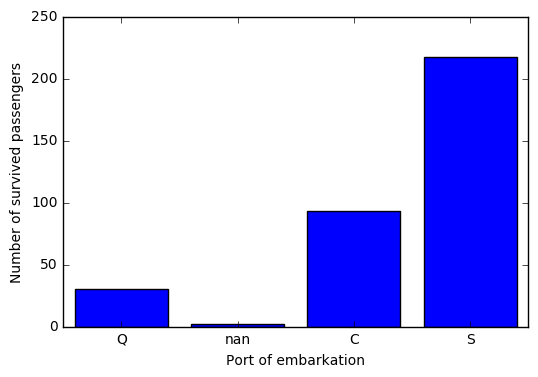

In [135]:
import collections
import numpy as np
import matplotlib.pyplot as plt

survived_in_embark = list ( train_df [ train_df['Survived'] == 1 ] ['Embarked'] )
survived_in_embark_count = collections.Counter ( survived_in_embark )

fig = plt.figure()
ax = fig.add_subplot(111)

frequencies = survived_in_embark_count.values()
names = survived_in_embark_count.keys()

x_coordinates = np.arange(len(survived_in_embark_count))
ax.bar(x_coordinates, frequencies, align='center')
ax.xaxis.set_major_locator(plt.FixedLocator(x_coordinates))
ax.xaxis.set_major_formatter(plt.FixedFormatter(names))
plt.ylabel('Number of survived passengers')
plt.xlabel('Port of embarkation')

plt.show()

-------------------------------------------------------------

### Dependence of survival on the 1st letter of cabin name and thus on the place of the passenger on board the ship

#### * there is too many 'nan' data in cabin name column
#### * passengers from cabins that start with "B" and "C" survived more frequently than from the cabin with other letters

In [144]:
survived_in_cabins =  list ( train_df [ train_df['Survived'] == 1 ] ['Cabin'] )
not_survived_in_cabins = list ( train_df [ train_df['Survived'] == 0 ] ['Cabin'] )
# not_survived_in_cabins

In [145]:
survived_in_cabins_df = pd.DataFrame( 0, index =[ "A", "B", "C", "D", "E", "F", "G", "T", "nan" ], \
                                     columns=["Survived", "Not survived"]) 
for cabin in survived_in_cabins:
    cabin = str (cabin)
    if not cabin == 'nan':
        survived_in_cabins_df.ix[ cabin[0], "Survived"] += 1
    else:
        survived_in_cabins_df.ix[cabin, "Survived"] += 1
        
for cabin in not_survived_in_cabins:
    cabin = str (cabin)
    if not cabin == 'nan':
        survived_in_cabins_df.ix[ cabin[0], "Not survived"] += 1
    else:
        survived_in_cabins_df.ix[cabin, "Not survived"] += 1
        
# print( survived_in_cabins_df["Survived"].values.tolist() )
print( survived_in_cabins_df )

     Survived  Not survived
A           7             8
B          35            12
C          35            24
D          25             8
E          24             8
F           8             5
G           2             2
T           0             1
nan       206           481


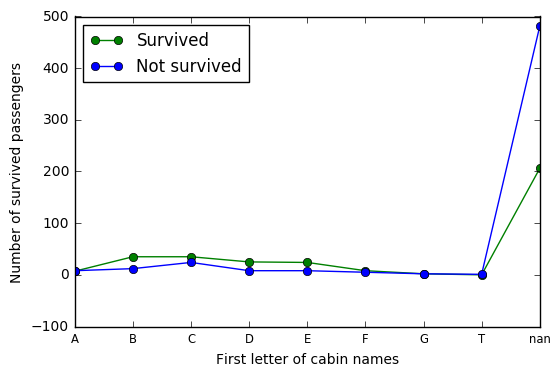

In [138]:
fig = plt.figure()
ax = fig.add_subplot(111)
x_axis=[ "A", "B", "C", "D", "E", "F", "G", "T", 'nan' ]
ax.plot( survived_in_cabins_df["Survived"].values.tolist(),'go-', label = 'Survived') 
ax.plot( survived_in_cabins_df["Not survived"].values.tolist(),'bo-', label = 'Not survived') 
plt.setp(ax.get_xticklabels(), visible=True)
plt.xticks(range(len(x_axis)), x_axis, size='small')
plt.ylim( -100, 500)
plt.xlabel('First letter of cabin names')
plt.ylabel('Number of survived passengers')
plt.legend(loc = 'best')
plt.show()

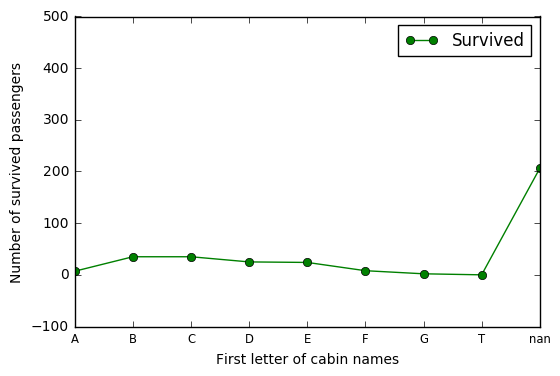

In [139]:
fig = plt.figure()
ax = fig.add_subplot(111)
x_axis=[ "A", "B", "C", "D", "E", "F", "G", "T", 'nan' ]
ax.plot( survived_in_cabins_df["Survived"].values.tolist(),'go-', label = 'Survived') 
plt.setp(ax.get_xticklabels(), visible=True)
plt.xticks(range(len(x_axis)), x_axis, size='small')
plt.ylim( -100, 500)
plt.xlabel('First letter of cabin names')
plt.ylabel('Number of survived passengers')
plt.legend(loc = 'best')
plt.show()

-------------------------------------------------------------

### Dependencies between age and survival

#### the greatest part of survived people are of the age 20-40 (150 people)
#### the highest death rate is for the same age interval, and may be eplained by the fact that most of the people on board were aged 20-40


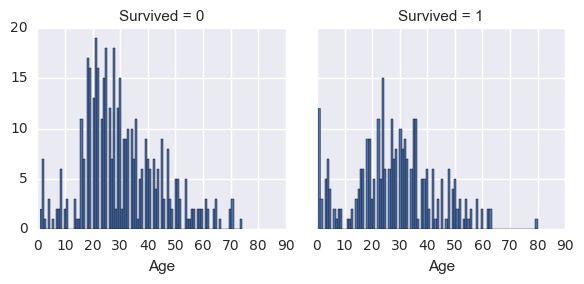

In [140]:
import seaborn as sns
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=100 )
plt.show()

In [141]:
print( max( train_df["Age"] ) , min( train_df["Age"] ) ) 

(80.0, 0.41999999999999998)


# 10. what would you do if there had been 100 bins ???

# use data binning;

In [172]:
bins = [0, 10., 20., 30., 40., 50., 60., 70., 80 ]
groups = train_df[['Survived','Age']].groupby(pd.cut(train_df.Age, bins))
print( groups.Survived.sum() )

Age
(0, 10]     38
(10, 20]    44
(20, 30]    84
(30, 40]    69
(40, 50]    33
(50, 60]    17
(60, 70]     4
(70, 80]     1
Name: Survived, dtype: int64
